In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

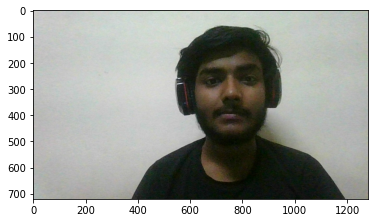

In [2]:
img_cv = cv2.imread('../images/myImage.jpg', cv2.IMREAD_COLOR)
img = plt.imread('../images/myImage.jpg')
plt.imshow(img)

In [6]:
path = r"../haar cascade files/haarcascade_lefteye_2splits.xml"
detector = cv2.CascadeClassifier("../haarcascade_frontalface_default.xml")
leftEyeDetector = cv2.CascadeClassifier(path)
rightEyeDetector = cv2.CascadeClassifier("../haar cascade files/haarcascade_righteye_2splits.xml")

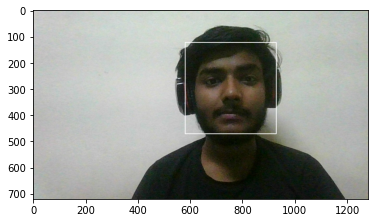

In [7]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
faces = detector.detectMultiScale(gray,1.3,5)
for face in faces:
    x,y,w,h = face
    img2 = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(img2)

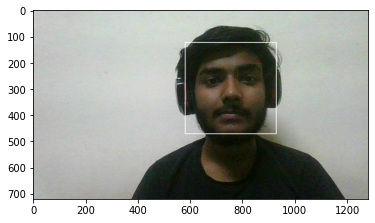

In [8]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
leftEyes = leftEyeDetector.detectMultiScale(gray)
for leftEye in leftEyes:
    x,y,w,h = leftEye
    img2 = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
plt.imshow(img2)

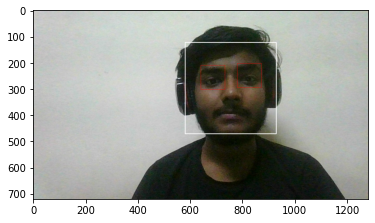

In [9]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
rightEyes = rightEyeDetector.detectMultiScale(gray)
for rightEye in rightEyes:
    x,y,w,h = rightEye
    img2 = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
plt.imshow(img2)

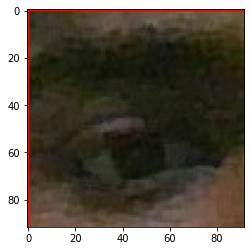

In [10]:
roi = img[y:y+h, x:x+w]
plt.imshow(roi)

In [11]:
# Convert to grayscale.
gray = cv2.cvtColor(img_cv[y:y+h, x:x+w], cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

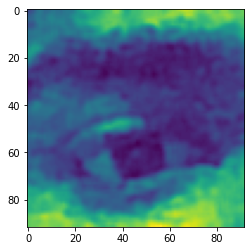

In [15]:
plt.imshow(gray_blurred)

In [16]:
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1.3, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)

In [17]:
detected_circles

array([[[37.05    , 64.35    , 21.669998],
        [14.95    , 35.75    , 20.5     ]]], dtype=float32)

In [28]:
abc = img_cv[y:y+h, x:x+w].copy()

In [29]:
abc = cv2.cvtColor(img_cv[y:y+h, x:x+w], cv2.COLOR_BGR2RGB)

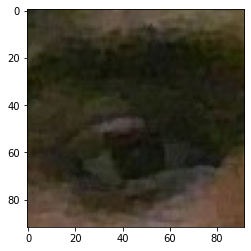

In [30]:
plt.imshow(abc)

In [31]:
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(abc, (a, b), r, (255, 0, 0), 1)

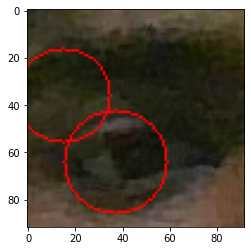

In [32]:
plt.imshow(abc)